Resumen/Informe
Valentini J. - Figueroa M.
Breve introducción: vamos a realizar todos los análisis y luego a sacar las conclusiones, aunque vamos a aclarar que estamos haceindo en cada cuadrito, para que sea mas orientativo, por ejemplo aclarando el tamaño de las imagenes a analizar.

In [7]:
import os 


In [2]:
import numpy as np #Imports basicos
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
for i in range(1,50): #Una imagen pequeña(100x100), que recibe como cantidad de filtros i(desde 1 a 50), 
                      # cabe destacara que la primera iteración es singlethreading. Resultados en el siguiente cuadro 
    cmd = "./tp blackwhite SS imgs/sign_2.ppm SS " + str(i)
    os.system(cmd)

In [14]:
dataframe = pd.read_csv('sign_2.ppmtabla.csv', names=[ 'Time','Area', 'Threads'])
dataframe

,Time,Area,Threads
0,0.007426,9801,1
1,0.017738,9801,2
2,0.012391,9801,4
3,0.014194,9801,5
4,0.011699,9801,6
5,0.010411,9801,7
6,0.008930,9801,8
7,0.012396,9801,10
8,0.012433,9801,12
9,0.013455,9801,13


Resultados de los runeos con la distintas cantidad de threads

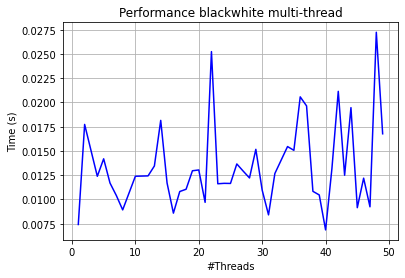

In [16]:
def plot(ths, time, std):

    fig, ax = plt.subplots()
    ax.plot(ths, time,'b-', color='blue')
    if np.any(std) != 0:
        ax.fill_between(ths, time-std, time+std, color='turquoise')


    ax.set(xlabel='#Threads', ylabel='Time (s)',
           title='Performance blackwhite multi-thread')
    ax.grid()

    fig.savefig("test.png")
    plt.show()

ths = dataframe['Threads']
time = dataframe['Time']
plot(ths,time, 0)

Como vemos, los resultados son "aleatorios", por ejemplo, con 40 threads se obtiene casi el mismo resultado(un poco mejor) que con 1, y con cuarenta y tantos se obtiene un peor resultado(el peor de hecho)

In [17]:
for i in range(1,50): #Una imagen pequeña(100x100), que recibe como cantidad de filtros i(desde 1 a 50), 
                      # cabe destacara que la primera iteración es singlethreading. Resultados en el siguiente cuadro
                      # Esta vez se realizan varias pruebas con todos los threads (veinte específicamente). Esto sirve 
                      # para sacar un promedio
    cmd = "./tp blackwhite SS imgs/sign_2.ppm SS " + str(i)
    for i in range(20):
            os.system(cmd)
            

In [18]:
dataframe = pd.read_csv('sign_2.ppmtabla.csv', names=[ 'Time','Area', 'Threads'])
dataframe

,Time,Area,Threads
0,0.007435,9801,1
1,0.011890,9801,1
2,0.009216,9801,1
3,0.020369,9801,1
4,0.014338,9801,1
...,...,...,...
895,0.017358,9801,49
896,0.018045,9801,49
897,0.022613,9801,49
898,0.016127,9801,49


In [19]:
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()

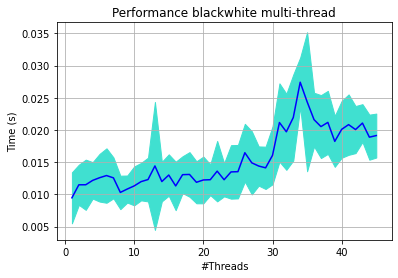

In [22]:
ths = np.arange(1,46)

plot(ths,df_mean_time, df_std_time )

Como vemos, por lo general, hacer pruebas múltiples puede dar resultados variados, pero en todos los puntos las pruebas oscilan entre 0,005 s del resultado original (tanto para arriba como para abajo). La linea azul es el promedio

Ahora vamos con una imagen grande?

In [32]:
for i in range(1,50): #Una imagen pequeña(900x700 arppox), que recibe como cantidad de filtros i(desde 1 a 50), 
                      # cabe destacara que la primera iteración es singlethreading. Resultados en el siguiente cuadro
    cmd = "./tp blackwhite SS imgs/totoro.ppm SS " + str(i)
    os.system(cmd)

In [40]:
dataframe = pd.read_csv('totoro.ppmtabla2.csv', names=[ 'Time','Area', 'Threads'])
dataframe

,Time,Area,Threads
0,0.456226,699223,1
1,0.491926,699223,2
2,0.478915,699223,3
3,0.445019,699223,4
4,0.478885,699223,5
5,0.558891,699223,6
6,0.737948,699223,8
7,0.561913,699223,9
8,0.470330,699223,10
9,0.579752,699223,11


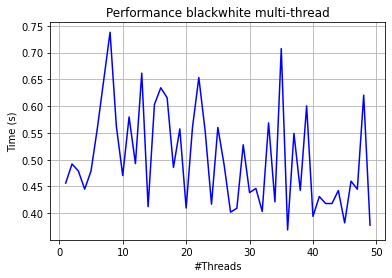

In [41]:
ths = dataframe['Threads']
time = dataframe['Time']
plot(ths,time, 0)

In [ ]:
Resultados muy distintos entre si, pero los picos mas bajos cada vez tienen resultados mas bajos. Esta lógica se aplica con

In [26]:
for i in range(1,50): # Una imagen pequeña(900x700 arppox), que recibe como cantidad de filtros i(desde 1 a 50), 
                      # cabe destacara que la primera iteración es singlethreading. Resultados en el siguiente cuadro.
                      # Esta vez se realizan varias pruebas con todos los threads (veinte específicamente). Esto sirve para
                      # sacar un promedio
    cmd = "./tp blackwhite SS imgs/totoro.ppm SS " + str(i)
    for n in range(0,20):
        os.system(cmd)
        

In [39]:
dataframe = pd.read_csv('totoro.ppmtabla.csv', names=[ 'Time','Area', 'Threads'])
dataframe

,Time,Area,Threads
0,0.456226,699223,1
1,0.491926,699223,2
2,0.478915,699223,3
3,0.445019,699223,4
4,0.478885,699223,5
...,...,...,...
1051,0.404019,699223,45
1052,0.445969,699223,46
1053,0.395572,699223,47
1054,0.475597,699223,48


Resultados similares

In [38]:
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()

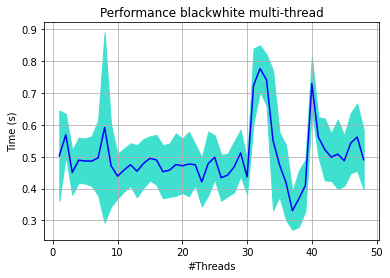

In [30]:
ths = np.arange(1,49)

plot(ths,df_mean_time, df_std_time )

Como vemos los resultados son mas vairados con una imagen mas grande, pero por lo general los resultados multithreads son mejores que los single thread.

# Conclusiones acerca del uso de Threads:

- Aclaraciones: es importante destacar que el resultado de algunas ejecuciones pueden ser mas largas por el hecho de que  en el sistema haya mas procesos ejecutando o que haya procesos en la cola del scheduler. Por otra parte es importante contemplar que pueden haber facotres variantes que pueden perjudicar la eficiencia del multithreading, que no se pueden controlar, almenos con mi conocimiento. ¿Por que blackwhite? por que tiene que hacer menos operaciones que el resto y se manejan resultados mas bajos, ademas de que ejecutar 1000 veces un programa cuesta y mas si este tarda el triple o el cuadruple. Por último, lo mas importante es que, el tiempo evaluado es el procesos de filtrado, NO confundir con el tiempo de ejecucion total del proceso, osea parseo del comando ingresado, filtrado y escritura de imagen.

- Concluciones: en esta conlución hay dos conceptos importantes, el valor de computo (o tiempo real de ejecución) de los context switch y el tiempo de computo de la ejecucion del thread mismo. Esto se debe a que son los dos factores que determinan el tiempo total del filtrado. ¿Por que? Por el hecho de que un context switch (algo que es necesario para un el cambio entre threads) puede terminar perjudicando el desgloze de la ejecución del filtrado. Por ejemplo, la ejecución total en single thread es 2s, pero y en multi thread (2 thread) es 1.5s de ejecución + 0.8s de context switch, algo que terminaría empeorando. Ahora puede ser que al aumentar el context switch el tiempo de ejecución sea mucho menor y el context switch apenas aumente, por ejemplo con 10 threads el tiempo de ejecución es 0.3 y de context switch sea 0.9, esto mejoraría el resultado. Esto quiere decir que hay un balance entre los threads y lo que el thread ejecuta. Ahora, hay otro concepto importante, muuuuchos threads, o un cantidades excesivas, puede significar que el context switch sea mas largo que su tiempo de ejecución, ¿Por que? debido a que lo que se le asigna para realizar es muy poco (un ejemplo sería, con las imágenes, que se deba recorrer y hacer pocos cálculos de los píxeles haciendo que el context switch dure mas que el procesos mismo). Otro factor determinante es que el proceso de filtrado no termina hasta que TODOS lo threads terminen, esto quiere decir que con que un solo thread no termine puede hacer que el proceso final termine durando lo que el thread. Como último facotr determinístico esta el hardware, lógicamente a mejor hardware o directamente CPU, mejores resultados (en throughput). Por una parte si yo tengo 10 unidades de procesamientos y 10 threads, y cada uno entra en cada unidad de procesamiento se tarda 0.1s, el total de ejecución sería lo mismo que el de un solo thread 0.1s(mas el tiempo de ejución del proceso original), ahora a mejor velocidad de ejecución (por parte de las unidades de procesamiento) menor será el tiempo de ejecución (0.01s por ejemplo).

- Análisis de ejecuciones (es importante que hay 6 unidades de procesamiento):
     - Ejecuciones únicas por threads (gráfico 1 y 3): para estos dos cuadros, que muestran resultados en tiempo por cada ejecución, se puede notar una cierta aleatoriedad, las ejecuciones saltan desde los picos mas bajos a los mas altos, lo que sí se puede notar es que cada pico bajo se mantienen con casi los mismo resultados en segundos (algunos inclusive bajan), aplicar el multi-thread no está claro en imagenes chicas, pero en imagenes grandes se pudo ver mejor resultados.
     - Ejecuciones múltiples por threads(gráfico 2 y 4): en este cuadro se puede ver una mejor entre los 8 y 13 threads aprox. sin embargo tienede a aumentar el promedio. Se puede notar como el multithread mejorar ligreamente, así como empeorarlo.
     - Conclución final: es mejor aplicar multithread en imagenes mas grandes y tener en cuenta los context switch. 